In [1]:
# Google BQ connector
from google.cloud import bigquery

# Data processing libraries
import pandas as pd
import numpy as np

# Data visualisation tools
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
# creating a BQ client
bqclient = bigquery.Client()

In [ ]:
def cache_query_result(query: str, ):
    ...

In [48]:
query = """
SELECT
  rounded_lat,
  rounded_lng,
  COUNT(rounded_lat) as count_pair,
FROM (
  SELECT
    TIMESTAMP_SECONDS(pingtimestamp) AS dt,
    ROUND(rawlat, 3) AS rounded_lat,
    ROUND(rawlng, 3) AS rounded_lng,
  FROM
    `jjkoh.grab_raw_singapore` )
GROUP BY
  rounded_lat,
  rounded_lng
ORDER BY
  count_pair DESC
"""

df = bqclient.query(query).result().to_dataframe()

In [49]:
df.head()

,rounded_lat,rounded_lng,count_pair
0,1.336,103.810,54308
1,1.335,103.811,53846
2,1.337,103.809,52138
3,1.329,103.866,49224
4,1.334,103.813,48831


In [60]:
df.describe()

,rounded_lat,rounded_lng,count_pair
count,19692.000000,19692.000000,19692.000000
mean,13.489484,1038.302504,4.952052
std,0.454517,0.814866,2.359191
min,12.420000,1036.140000,0.000000
25%,13.160000,1037.730000,3.218876
50%,13.420000,1038.370000,4.828314
75%,13.780000,1038.880000,6.630683
max,14.660000,1040.310000,10.902427


In [58]:
df.count_pair = np.log(df.count_pair)

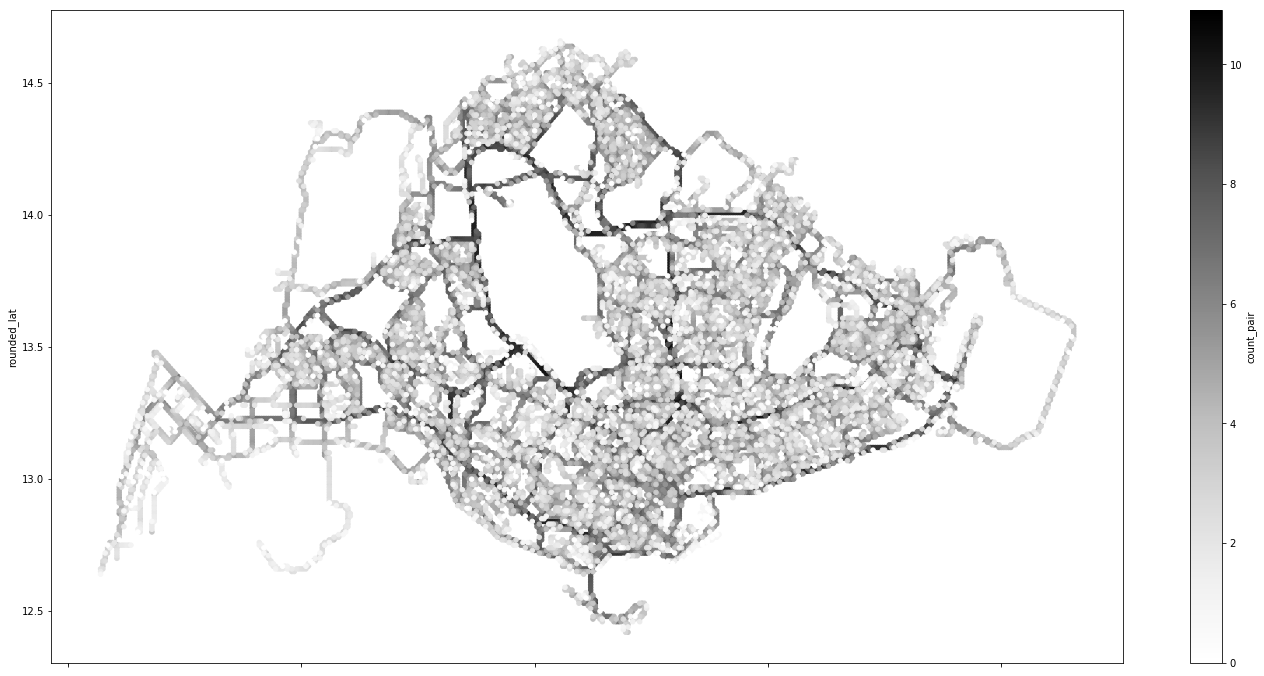

In [59]:
df.plot.scatter(x="rounded_lng", y="rounded_lat", c="count_pair", figsize=(24, 12))

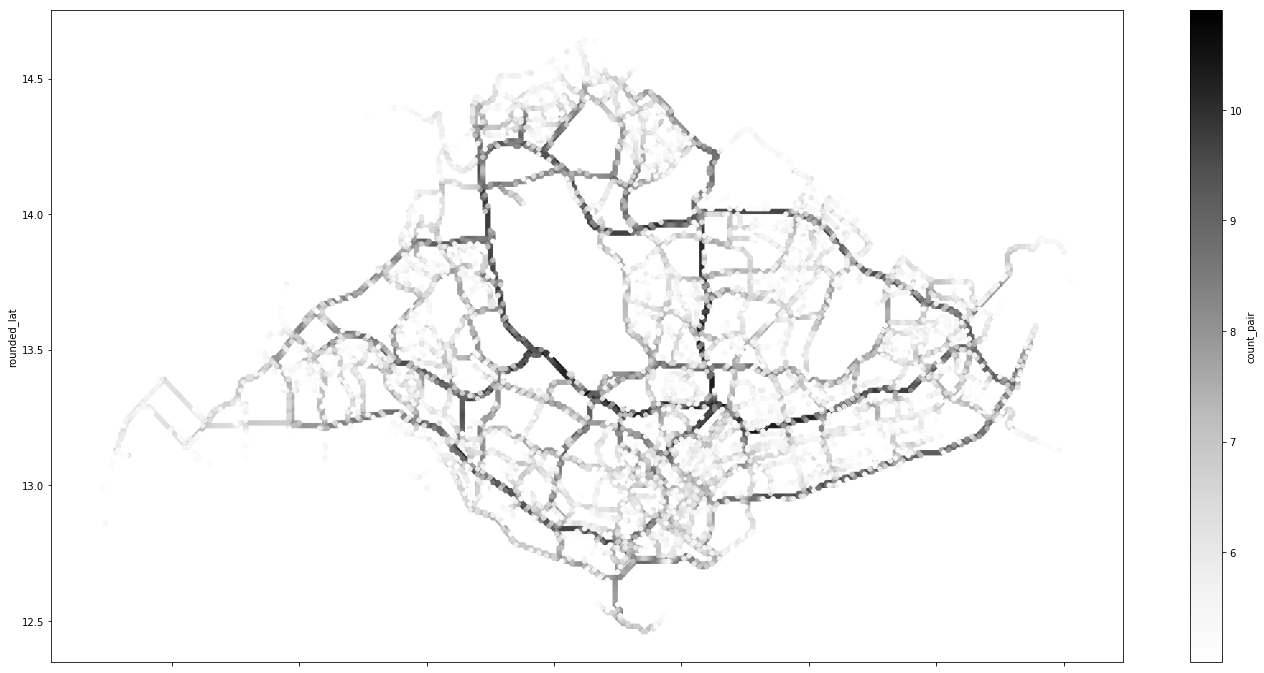

In [66]:
df[df.count_pair > 5].plot.scatter(x="rounded_lng", y="rounded_lat", c="count_pair", figsize=(24, 12))

In [4]:
query = """
SELECT
  rounded_lat,
  rounded_lng,
  COUNT(rounded_lat) as count_pair,
  AVG(speed) as avg_speed
FROM (
  SELECT
    TIMESTAMP_SECONDS(pingtimestamp) AS dt,
    ROUND(rawlat, 4) AS rounded_lat,
    ROUND(rawlng, 4) AS rounded_lng,
    speed
  FROM
    `jjkoh.grab_raw_singapore` )
GROUP BY
  rounded_lat,
  rounded_lng
ORDER BY
  count DESC
"""

df = bqclient.query(query).result().to_dataframe()

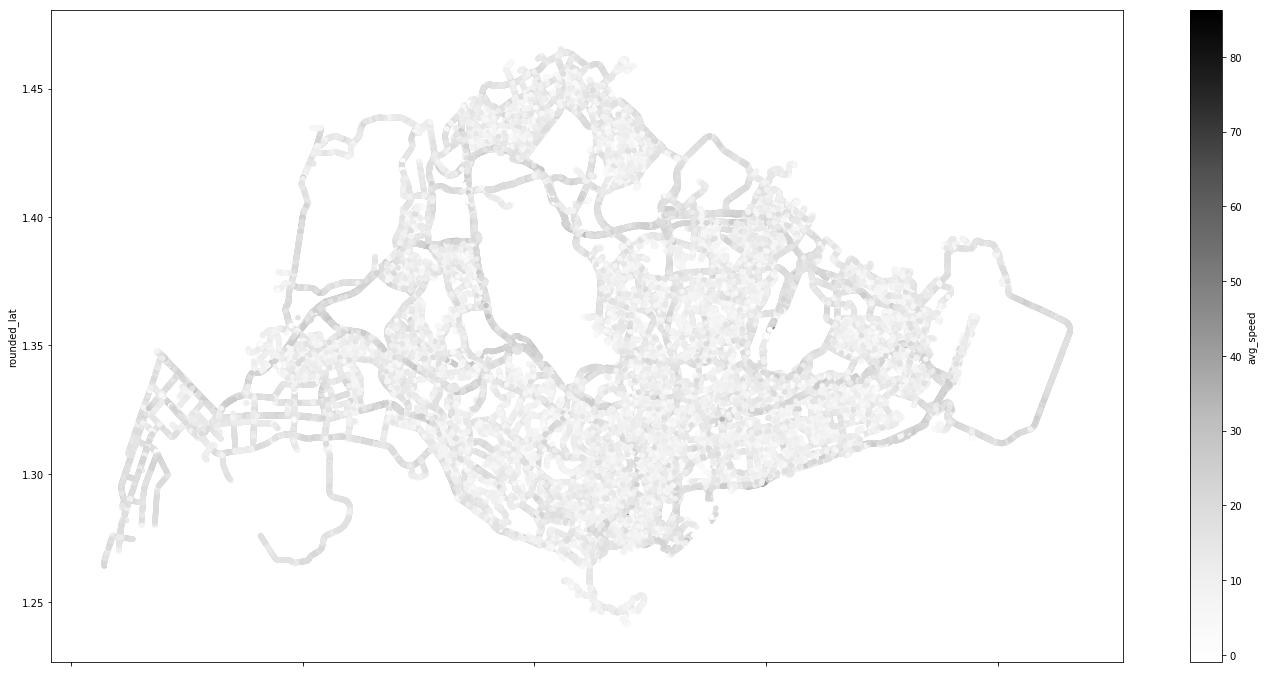

In [6]:
df.plot.scatter(x="rounded_lng", y="rounded_lat", c="avg_speed", figsize=(24, 12))

In [4]:
query = """
SELECT
  rounded_lat,
  rounded_lng,
  COUNT(rounded_lat) as count_pair,
FROM (
  SELECT
    EXTRACT(DAYOFWEEK FROM TIMESTAMP_SECONDS(pingtimestamp)) AS day_of_week,
    ROUND(rawlat, 3) AS rounded_lat,
    ROUND(rawlng, 3) AS rounded_lng,
  FROM
    `jjkoh.grab_raw_singapore` )
WHERE
    day_of_week = 1
GROUP BY
  rounded_lat,
  rounded_lng,
  day_of_week
ORDER BY
  count_pair DESC
"""

df = bqclient.query(query).result().to_dataframe()

In [6]:
df.count_pair = np.log(df.count_pair)

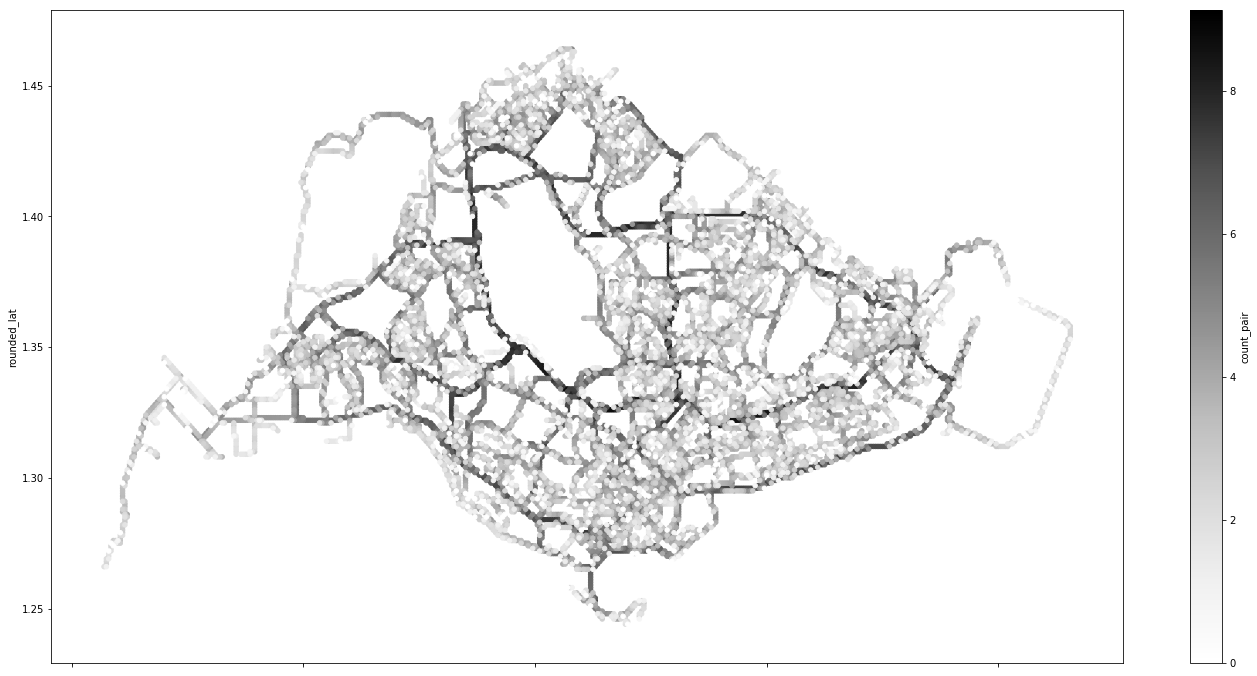

In [7]:
df.plot.scatter(x="rounded_lng", y="rounded_lat", c="count_pair", figsize=(24, 12))

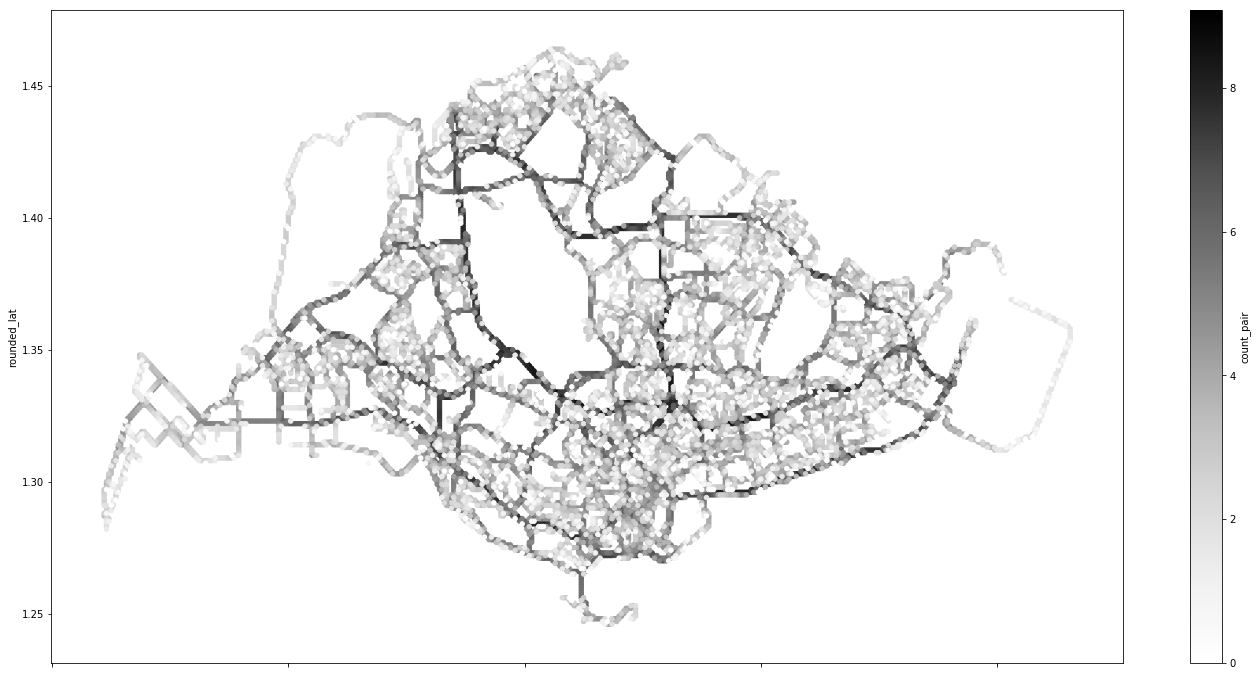

In [8]:
query = """
SELECT
  rounded_lat,
  rounded_lng,
  COUNT(rounded_lat) as count_pair,
FROM (
  SELECT
    EXTRACT(DAYOFWEEK FROM TIMESTAMP_SECONDS(pingtimestamp)) AS day_of_week,
    ROUND(rawlat, 3) AS rounded_lat,
    ROUND(rawlng, 3) AS rounded_lng,
  FROM
    `jjkoh.grab_raw_singapore` )
WHERE
    day_of_week = 5
GROUP BY
  rounded_lat,
  rounded_lng,
  day_of_week
ORDER BY
  count_pair DESC
"""

df = bqclient.query(query).result().to_dataframe()
df.count_pair = np.log(df.count_pair)
df.plot.scatter(x="rounded_lng", y="rounded_lat", c="count_pair", figsize=(24, 12))

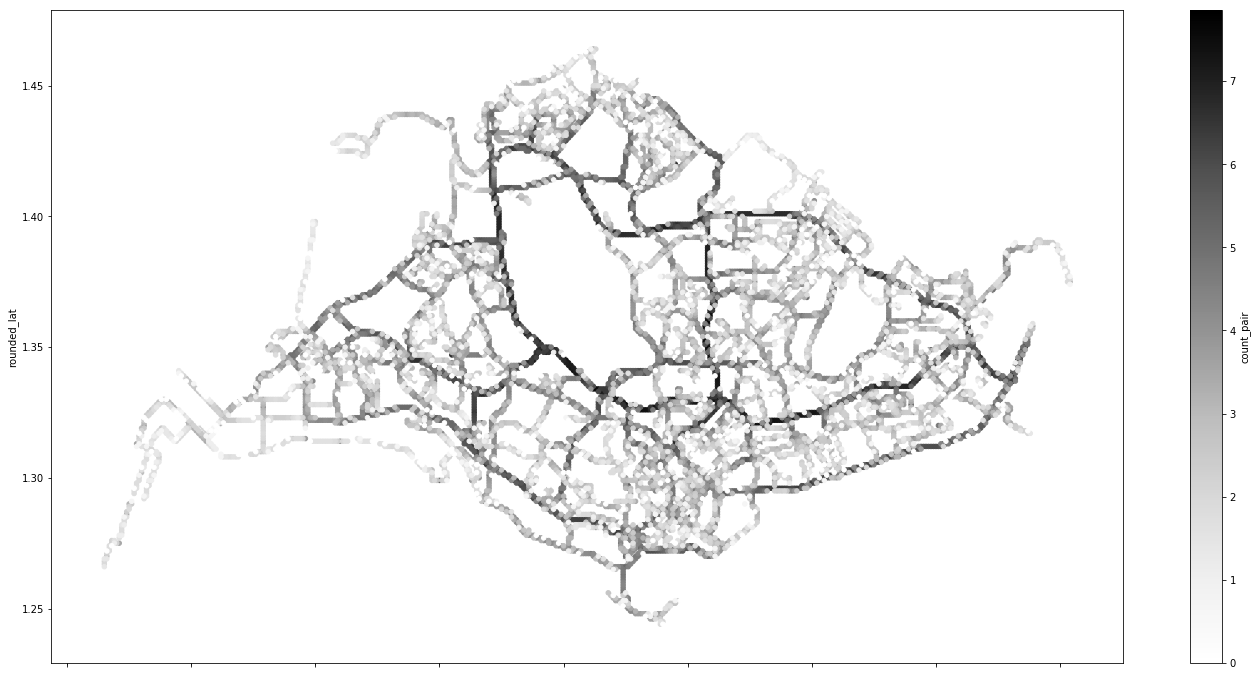

In [9]:
query = """
SELECT
  rounded_lat,
  rounded_lng,
  COUNT(rounded_lat) as count_pair,
FROM (
  SELECT
    EXTRACT(HOUR FROM TIMESTAMP_SECONDS(pingtimestamp)) AS hour,
    ROUND(rawlat, 3) AS rounded_lat,
    ROUND(rawlng, 3) AS rounded_lng,
  FROM
    `jjkoh.grab_raw_singapore` )
WHERE
    hour = 12
GROUP BY
  rounded_lat,
  rounded_lng,
  hour
ORDER BY
  count_pair DESC
"""

df = bqclient.query(query).result().to_dataframe()
df.count_pair = np.log(df.count_pair)
df.plot.scatter(x="rounded_lng", y="rounded_lat", c="count_pair", figsize=(24, 12))

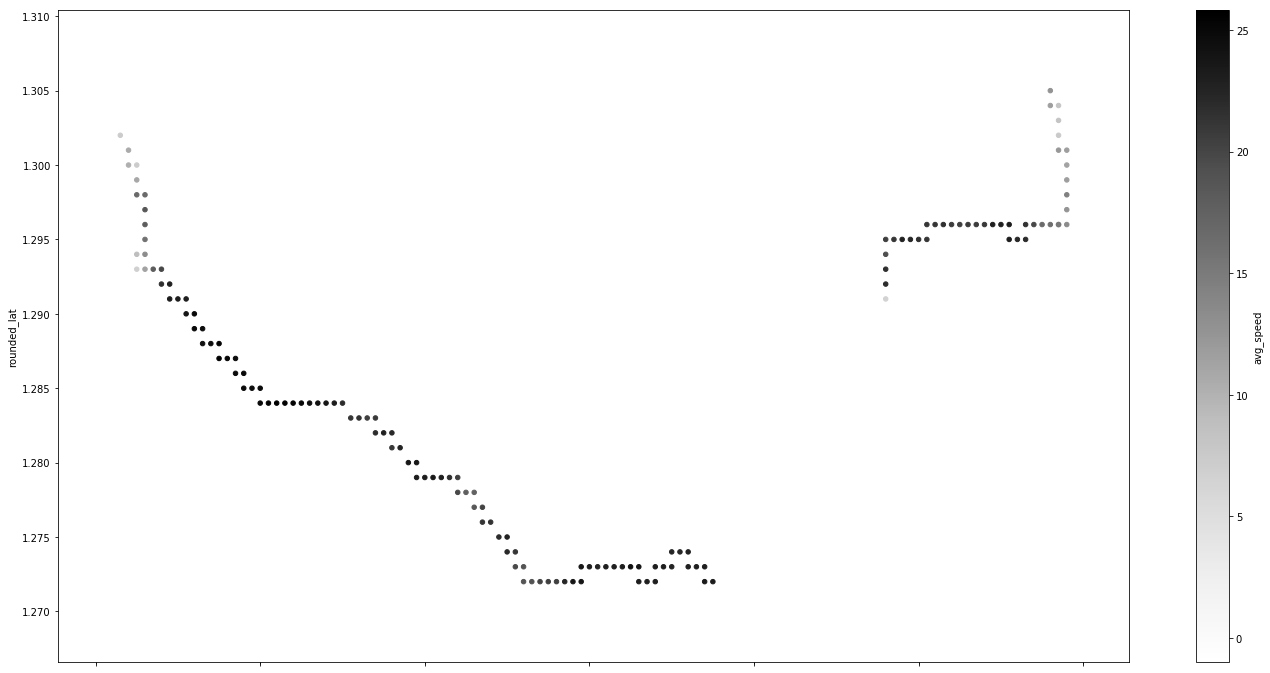

In [16]:
query = """
SELECT
  ROUND(rawlat, 3) AS rounded_lat,
  ROUND(rawlng, 3) AS rounded_lng,
  EXTRACT(HOUR FROM TIMESTAMP_SECONDS(pingtimestamp)) AS hour,
  AVG(speed) as avg_speed
FROM
  `jjkoh95.jjkoh.grab_raw_singapore_74361`
GROUP BY
  rounded_lat, rounded_lng, hour
"""

df = bqclient.query(query).result().to_dataframe()
df.plot.scatter(x="rounded_lng", y="rounded_lat", c="avg_speed", figsize=(24, 12))

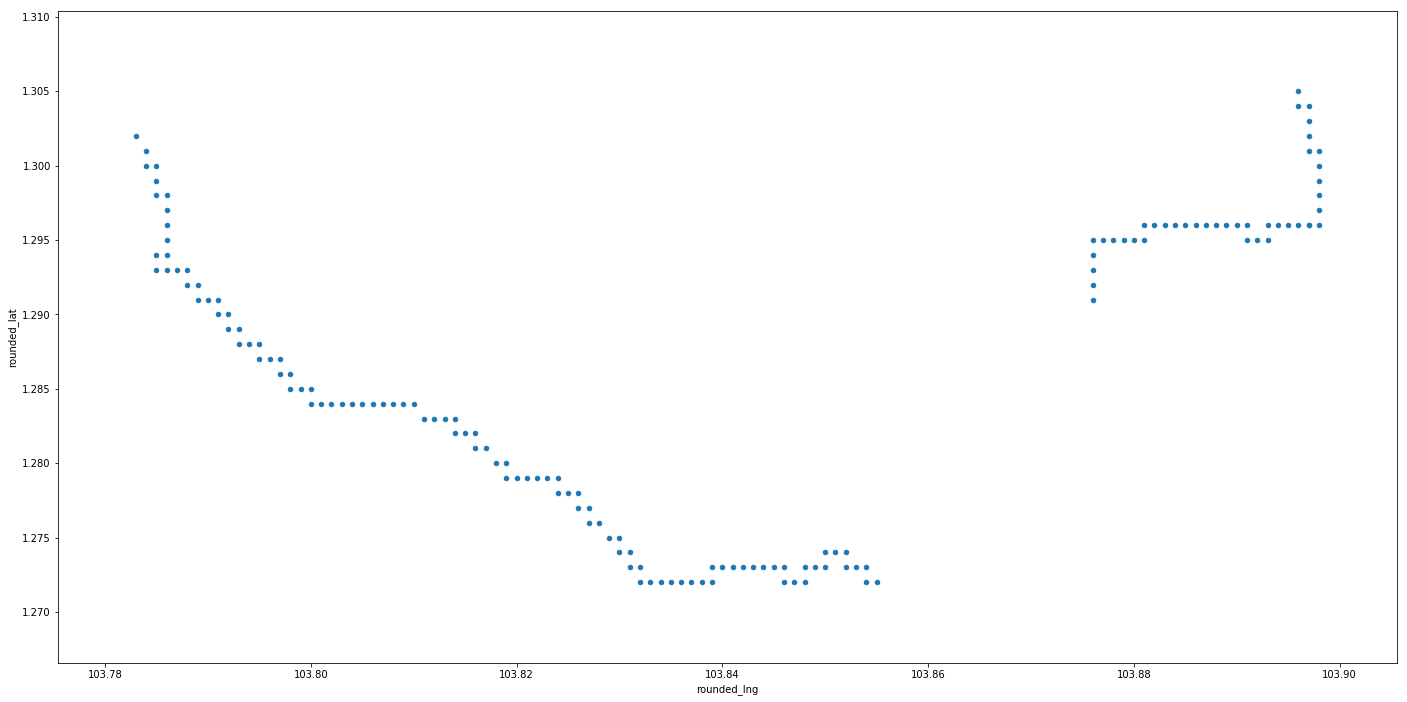

In [20]:
df[df.avg_speed > 0].plot.scatter(x="rounded_lng", y="rounded_lat", figsize=(24, 12))